In [52]:
"""
Imports and global functions.
"""


from CommonUtilities import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
set_printoptions(suppress=True)


# Load experiment data, drop blank columns, and filter outliers.
experiments = pd.read_csv("pendulumData.csv")
g_I = experiments["g (m/s2)"].to_numpy()
g_I = g_I[~isnan(g_I)]
g_I = g_I[g_I < 900]

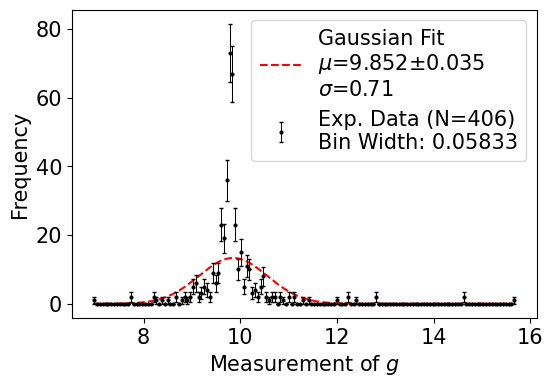

In [53]:
N_bins = 150
counts, edges = histogram(g_I, N_bins)
centers = (edges[:-1] + edges[1:]) / 2
width = centers[1] - centers[0]

N = len(g_I)
mu, sigma = mean(g_I), std(g_I, ddof=1)
grid = linspace(amin(g_I), amax(g_I), 1000)
sigma_mu = sigma / sqrt(N)
scale = N * width

fig, ax = plt.subplots(figsize=(6, 4))

ax.set_xlabel("Measurement of $g$", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.tick_params(which="both", labelsize=15)

plt.errorbar(centers, counts, yerr=sqrt(counts),
             fmt='o', c="k", markersize=2, capsize=1.5, elinewidth=0.75, zorder=10,
             label=f"Exp. Data (N={N})\nBin Width: {width:.5f}")
ax.plot(grid, scale * norm.pdf(grid, mu, sigma),
        linestyle="--", color="r", label=f"Gaussian Fit\n$\\mu$={mu:.3f}±{sigma_mu:.3f}\n$\\sigma$={sigma:.2f}")
ax.legend(fontsize=15)
plt.savefig("021525HW.png", dpi=300, bbox_inches="tight")